In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:

## Data Analysis Phase
## MAin aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)


# importing missingo library which helps us to visualize the missing values
import missingno as msno

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from collections import OrderedDict



In [3]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [4]:
# Step 1: Load data
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [5]:
# Filter dataset to remove negative or zero transaction amounts
df = df[df['amount'] > 0]

In [6]:
# Display the first 10 rows of the DataFrame
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [7]:
# Making function to check missing or null values of dataframes
def missing_values(df): 
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [8]:
missing_values(df)

,index,Missing Values,% of Total Values,Data_type
0,step,0,0.0,int64
1,type,0,0.0,object
2,amount,0,0.0,float64
3,nameOrig,0,0.0,object
4,oldbalanceOrg,0,0.0,float64
5,newbalanceOrig,0,0.0,float64
6,nameDest,0,0.0,object
7,oldbalanceDest,0,0.0,float64
8,newbalanceDest,0,0.0,float64
9,isFraud,0,0.0,int64


In [9]:
# To know the size of datast
df.shape

(6362604, 11)

In [10]:
# Get an overview of the DataFrame including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362604 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


In [11]:
# Convert class variables type to object
df['isFraud'] = df['isFraud'].astype('object')

Trước khi tiến hành phân tích, chúng ta hãy trình bày thống kê tóm tắt của các biến. Trong trường hợp biến số, chúng ta hãy đánh giá giá trị trung bình, độ lệch chuẩn và phạm vi giá trị ở các phần trăm khác nhau.

In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
count,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06,6.362604e+06
mean,2.433965e+02,1.798624e+05,8.338852e+05,8.551158e+05,1.100702e+06,1.224997e+06,2.514694e-06
std,1.423311e+02,6.038589e+05,2.888246e+06,2.924052e+06,3.399183e+06,3.674132e+06,1.585777e-03
min,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338975e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487288e+04,1.420858e+04,0.000000e+00,1.327058e+05,2.146616e+05,0.000000e+00
75%,3.350000e+02,2.087218e+05,1.073160e+05,1.442585e+05,9.430367e+05,1.111910e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


Trong trường hợp biến phân loại, chúng ta chỉ đánh giá số lượng danh mục duy nhất, danh mục có tần suất xuất hiện nhiều nhất và tần suất của danh mục đó.

In [13]:
# Summary of Statistics of Categorical Variables
df.describe(include=['object'])

,type,nameOrig,nameDest,isFraud
count,6362604,6362604,6362604,6362604
unique,5,6353291,2722359,2
top,CASH_OUT,C1784010646,C1286084959,0
freq,2237484,3,113,6354407


# EDA

<Axes: xlabel='amount'>

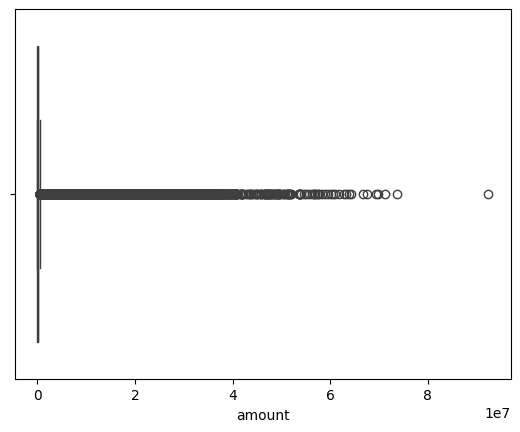

In [14]:
sns.boxplot(x = df['amount'])

### Sự mất cân bằng dữ liệu


Trong phân tích thăm dò này, chúng tôi đánh giá sự mất cân bằng lớp trong tập dữ liệu. Sự mất cân bằng lớp được định nghĩa là phần trăm của tổng số giao dịch được trình bày trong cột isFraud.

In [15]:
Total_transactions = len(df)
normal = len(df[df.isFraud == 0])
fraudulent = len(df[df.isFraud == 1])
fraud_percentage = round(fraudulent/Total_transactions*100, 2)
print('Tổng số giao dịch là {}'.format(Total_transactions))
print('Số giao dịch bình thường là {}'.format(normal))
print('Số giao dịch gian lận là {}'.format(fraudulent))
print('Tỷ lệ phần trăm giao dịch gian lận là {}'.format(fraud_percentage))

Tổng số giao dịch là 6362604
Số giao dịch bình thường là 6354407
Số giao dịch gian lận là 8197
Tỷ lệ phần trăm giao dịch gian lận là 0.13


In [16]:
normal_percentage = round(normal/Total_transactions*100, 2)
print('Tỷ lệ giao dịch bình thường là {}'.format(normal_percentage))

Tỷ lệ giao dịch bình thường là 99.87


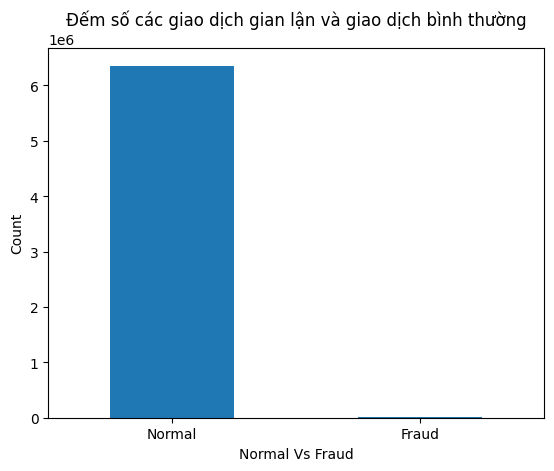

In [17]:
# Visualize
labels = ["Normal", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort=True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Đếm số các giao dịch gian lận và giao dịch bình thường")
plt.ylabel("Count")
plt.xlabel("Normal Vs Fraud")
plt.xticks(range(2), labels)
plt.show()

### Các loại giao dịch

type
CASH_OUT    2237484
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


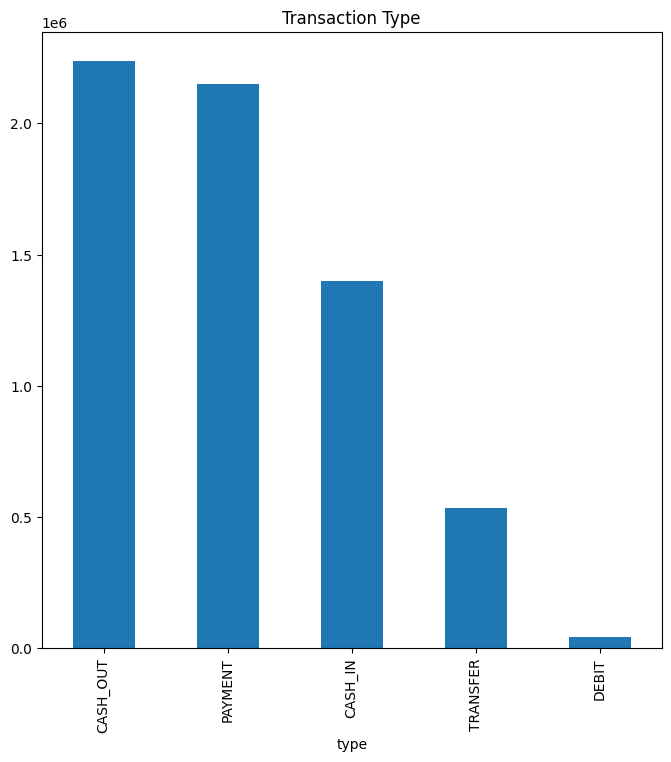

In [18]:
print(df.type.value_counts())

# Visualize the above data
f, ax = plt.subplots(1, 1, figsize=(8,8))
df.type.value_counts().plot(kind='bar', title="Transaction Type", ax=ax, figsize=(8,8))
plt.show()

Các loại giao dịch thường gặp nhất là CASH-OUT và PAYMENT.

Có 2 cờ nổi bật với tôi và rất thú vị khi xem xét: cột isFraud và isFlaggedFrad. Theo Từ điển dữ liệu, isFraud là chỉ báo cho biết các giao dịch gian lận thực tế trong khi isFlaggedFraud là chỉ báo mà hệ thống ngăn chặn giao dịch do một số ngưỡng được kích hoạt.

Hãy nhanh chóng kiểm tra loại giao dịch nào đang được gắn cờ và là gian lận.

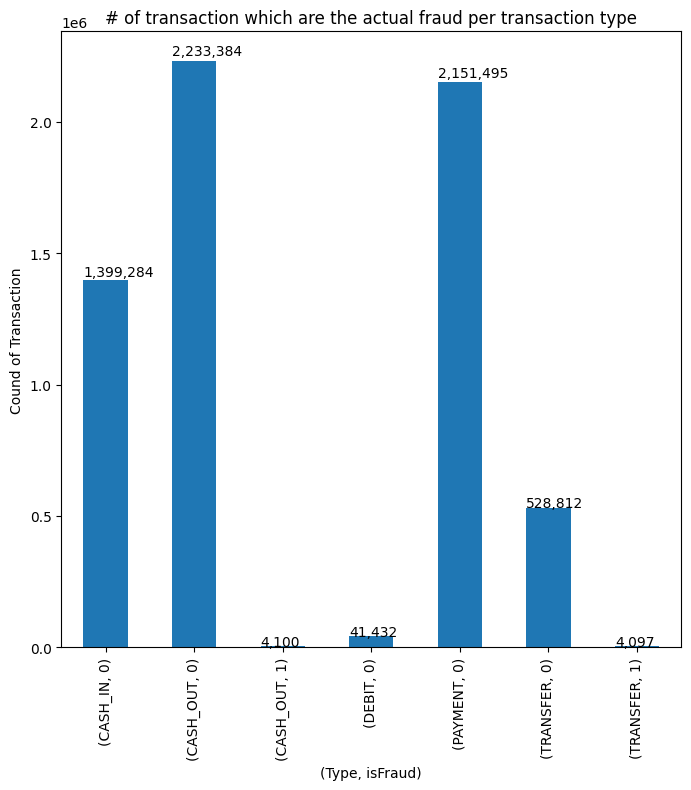

In [19]:
ax = df.groupby(['type', 'isFraud']).size().plot(kind='bar', figsize=(8,8))
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Cound of Transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

type
CASH_OUT    4100
TRANSFER    4097
CASH_IN        0
DEBIT          0
PAYMENT        0
Name: isFraud, dtype: object


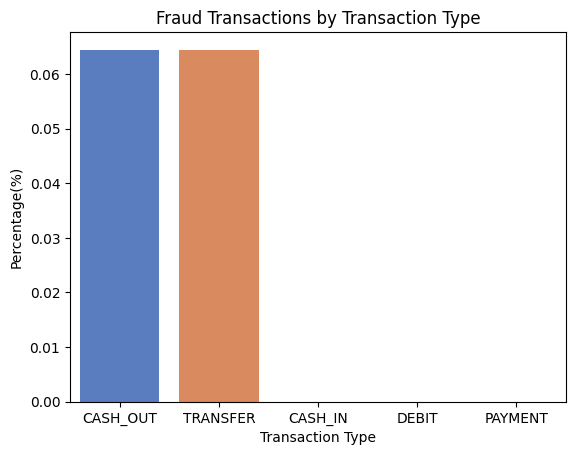

In [20]:
fraud_by_type = df.groupby('type')['isFraud'].sum().sort_values(ascending = False)
print(fraud_by_type)
sns.barplot(x=fraud_by_type.index, y=fraud_by_type.values/len(df)*100, palette='muted')
plt.ylabel('Percentage(%)')
plt.xlabel('Transaction Type')
plt.title('Fraud Transactions by Transaction Type')
plt.show()

In [21]:
fraud_df = df[(df["isFraud"] == 1)]
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8197 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            8197 non-null   int64  
 1   type            8197 non-null   object 
 2   amount          8197 non-null   float64
 3   nameOrig        8197 non-null   object 
 4   oldbalanceOrg   8197 non-null   float64
 5   newbalanceOrig  8197 non-null   float64
 6   nameDest        8197 non-null   object 
 7   oldbalanceDest  8197 non-null   float64
 8   newbalanceDest  8197 non-null   float64
 9   isFraud         8197 non-null   object 
 10  isFlaggedFraud  8197 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 768.5+ KB


In [22]:
non_fraud = len(fraud_df[fraud_df.isFraud == 0])
fraud = len(fraud_df[fraud_df.isFraud == 1])
print(non_fraud)
print(fraud)

0
8197


In [23]:
fraud_df.describe(include=['object'])

,type,nameOrig,nameDest,isFraud
count,8197,8197,8197,8197
unique,2,8197,8154,1
top,CASH_OUT,C1305486145,C52390890,1
freq,4100,1,2,8197


Chỉ có các giao dịch CASH-OUT và TRANSFER mới có thể là gian lận. Vì vậy, chỉ giữ lại hai loại giao dịch này trong tập dữ liệu của chúng tôi là hợp lý.

Và từ hình trên, các giao dịch gian lận được chia thành tỷ lệ phần trăm bằng nhau.

Do đó, khả năng giao dịch gian lận là CASH_OUT hoặc TRANSFER gần như bằng nhau.

Vì chỉ có các giao dịch CASH-OUT và TRANSFER mới có thể là gian lận, chúng ta hãy giảm kích thước của tập dữ liệu bằng cách chỉ giữ lại các loại giao dịch này và xóa PAYMENT, CASH-IN và DEBIT.

In [24]:
new_df = df.loc[df['type'].isin(['CASH_OUT', 'TRANSFER']),:]
print('Dữ liệu mới có', len(new_df), 'giao dịch.')

Dữ liệu mới có 2770393 giao dịch.


In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770393 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 253.6+ MB


In [26]:
new_df.describe(include=['object'])

,type,nameOrig,nameDest,isFraud
count,2770393,2770393,2770393,2770393
unique,2,2768614,509561,2
top,CASH_OUT,C1902386530,C1286084959,0
freq,2237484,3,75,2762196


# Kiểm tra tính hợp lệ của dữ liệu

### Số tiền giao dịch âm hoặc bằng không

Đầu tiên, hãy kiểm tra xem cột số tiền có luôn dương hay không. 

Hai đoạn mã sau đây chia nhỏ số lượng giao dịch có số tiền âm và số tiền có số tiền bằng 0.

In [27]:
#Check that there are no negative amounts
print("Số lượng giao dịch có số tiền giao dịch là số âm: " + str(sum(new_df['amount'] < 0)))

#Check instances where transacted amount is 0
print("Số lượng giao dịch có số tiền giao dịch là 0: " + str(sum(new_df['amount'] == 0)))

Số lượng giao dịch có số tiền giao dịch là số âm: 0
Số lượng giao dịch có số tiền giao dịch là 0: 0


In [28]:
trans_0 = new_df[new_df['amount'] == 0]
trans_0

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


Chỉ có một số ít trường hợp mà số tiền giao dịch là 0. Chúng ta quan sát bằng cách khám phá dữ liệu của các giao dịch này rằng tất cả chúng đều là giao dịch gian lận. Vì vậy, chúng ta có thể cho rằng nếu số tiền giao dịch là 0, thì giao dịch là gian lận.

Hãy loại bỏ các giao dịch này khỏi dữ liệu và bao gồm điều kiện này khi đưa ra dự đoán cuối cùng.

In [29]:
# Remove 0 amount values
new_df = new_df.loc[new_df['amount'] > 0,:]

In [30]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2770393 entries, 2 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 253.6+ MB


In [31]:
# Nhóm dữ liệu theo loại giao dịch và tính toán số tiền giao dịch trung bình
mean_amounts = new_df.groupby('type')['amount'].mean()

# Nhóm dữ liệu theo loại giao dịch và tính toán số tiền giao dịch trung vị
median_amounts = new_df.groupby('type')['amount'].median()

# In kết quả
print('Số tiền giao dịch trung bình theo loại:')
print(mean_amounts)

print('\nSố tiền giao dịch trung vị theo loại:')
print(median_amounts)
     

Số tiền giao dịch trung bình theo loại:
type
CASH_OUT    176275.224862
TRANSFER    910647.009645
Name: amount, dtype: float64

Số tiền giao dịch trung vị theo loại:
type
CASH_OUT    147073.795
TRANSFER    486308.390
Name: amount, dtype: float64


### Số dư của người khởi tạo và số dư của người nhận

In [32]:
new_df_count = len(new_df)
orig_initial_balance = len(new_df[new_df.oldbalanceOrg == 0])
per_orig_initial_balance = str(round((orig_initial_balance/new_df_count)*100, 2))
print(f"Tỷ lệ phần trăm các giao dịch mà số dư ban đầu của bên người khởi tạo là 0: {per_orig_initial_balance}%")

dest_final_balance = len(new_df[new_df.newbalanceDest == 0])
per_dest_final_balance = str(round(dest_final_balance/new_df_count*100, 2))
print(f"Tỷ lệ phần trăm các giao dịch mà số dư cuối cùng của bên người nhận là 0: {per_dest_final_balance}%" )

Tỷ lệ phần trăm các giao dịch mà số dư ban đầu của bên người khởi tạo là 0: 47.23%
Tỷ lệ phần trăm các giao dịch mà số dư cuối cùng của bên người nhận là 0: 0.6%


Do đó, trong gần một nửa số giao dịch, số dư ban đầu của bên khởi tạo được ghi lại là 0. Tuy nhiên, trong ít hơn 1% trường hợp, số dư cuối cùng của bên nhận được ghi lại là 0.

Lý tưởng nhất là số dư cuối cùng của bên nhận phải bằng số dư ban đầu của bên nhận cộng với số tiền giao dịch. Tương tự như vậy, số dư cuối cùng của bên khởi tạo phải bằng số dư ban đầu của bên khởi tạo trừ đi số tiền giao dịch.

Vì vậy, hãy kiểm tra các điều kiện này để xem các biến số dư cũ và số dư mới có được ghi lại chính xác cho cả bên khởi tạo và bên nhận hay không.

In [33]:
new_df['dest_final_balance'] = new_df['oldbalanceDest'] + new_df['amount']
new_df.head()
new_df['orig_final_balance'] = new_df['oldbalanceOrg'] - new_df['amount']
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89


In [34]:
c1 = len(new_df[new_df.newbalanceDest != new_df.dest_final_balance])
print("Giao dịch mà số dư đích không được ghi lại chính xác: "+ str(round(c1/new_df_count*100, 2)) + "%")

c2 = len(new_df[new_df.newbalanceOrig != new_df.orig_final_balance])
print("Các giao dịch mà số dư của người khởi tạo không được ghi lại chính xác: " + str(round(c2/new_df_count*100, 2)) + "%")

Giao dịch mà số dư đích không được ghi lại chính xác: 42.09%
Các giao dịch mà số dư của người khởi tạo không được ghi lại chính xác: 93.72%


Chúng ta có thể thấy rằng trong hầu hết các giao dịch, số dư cuối cùng của người khởi tạo không được ghi lại chính xác và trong gần một nửa số trường hợp, số dư cuối cùng của người nhận không được ghi lại chính xác.

Có thể sẽ rất thú vị khi xem liệu bất kỳ sự khác biệt nào được xác định ở trên có khác nhau giữa các giao dịch gian lận và các giao dịch không gian lận hay không. Điều này sẽ được thực hiện trong các phần tiếp theo.

### Balance

Trong phần trước về Kiểm tra sự hợp lệ, tôi nhận thấy có sự không chính xác trong cách ghi lại biến số dư cho cả người khởi tạo và người nhận. Chúng tôi cũng quan sát thấy rằng trong một nửa trường hợp alomist, số dư ban đầu của người khởi tạo được ghi lại là 0.

In [35]:
fraud_trans = len(new_df[new_df.isFraud == 1])
c3 = len(new_df[(new_df.oldbalanceOrg == 0) & (new_df.isFraud == 1)])
print("% giao dịch gian lận có số dư ban đầu của người khởi tạo là 0: " + str(round(c3/fraud_trans*100, 2)) + "%")

gen_trans = len(new_df[new_df.isFraud == 0])
c4 = len(new_df[(new_df.oldbalanceOrg == 0) & (new_df.isFraud == 0)])
print("% giao dịch hợp lệ có số dư ban đầu của người khởi tạo là 0: " + str(round(c4/gen_trans*100, 2)) + "%")

% giao dịch gian lận có số dư ban đầu của người khởi tạo là 0: 0.3%
% giao dịch hợp lệ có số dư ban đầu của người khởi tạo là 0: 47.37%


Trong các giao dịch gian lận, số dư ban đầu của bên khởi tạo chỉ là 0 0,3% thời gian so với 47% trong trường hợp giao dịch không gian lận. Đây có thể là một điểm khác biệt tiềm ẩn giữa hai loại.

Hãy kiểm tra độ không chính xác trong biến số dư và so sánh giữa gian lận và không gian lận. Độ không chính xác được định nghĩa là sự khác biệt giữa số dư phải tính đến số tiền giao dịch và số tiền được ghi nhận là số dư.

Tôi tính toán độ không chính xác của số dư cho cả bên khởi tạo và bên đích như sau:

In [36]:
new_df['origBalance_inacc'] = (new_df['oldbalanceOrg'] - new_df['amount']) - new_df['newbalanceOrig']
new_df['destBalance_inacc'] = (new_df['oldbalanceDest'] + new_df['amount']) - new_df['newbalanceDest']

In [37]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,181.00,0.00,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,21363.00,0.00,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,234216.94,-213808.94,-213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,237735.30,-214605.30,-214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,317952.89,-300850.89,-300850.89,-2401220.0


Nhìn chung, tôi đã xác định một số chiều mà qua đó có thể phân biệt được các giao dịch gian lận với các giao dịch không gian lận. Các chiều này như sau:

* bước thời gian - các giao dịch gian lận có khả năng xảy ra như nhau ở mọi bước thời gian, nhưng các giao dịch thực sự đạt đỉnh ở các bước thời gian cụ thể
* số dư - số dư ban đầu của bên khởi tạo có nhiều khả năng là 0 trong trường hợp giao dịch thực sự hơn là giao dịch gian lận
* số dư không chính xác - số dư đích không chính xác có khả năng là số âm trong trường hợp giao dịch thực sự nhưng là số dương trong trường hợp giao dịch gian lận

# Mô hình dự đoán để phát hiện gian lận

Trong các phần trước, tôi đã xác định các chiều giúp phát hiện giao dịch gian lận. Dựa trên các kết quả này, hãy xây dựng các mô hình phân loại có giám sát.

### Tạo bộ dữ liệu mô hình hóa

Hãy chọn các biến cần thiết cho mô hình ML, mã hóa các biến phân loại thành số và chuẩn hóa dữ liệu.

Tên của người khởi tạo và người đích không cần thiết cho phân loại. Vì vậy, hãy xóa chúng.

In [38]:
print("Giao dịch gian lận của tập dữ liệu đã lọc: {0:.4f}%".format((len(new_df[new_df.isFraud == 1])/len(new_df))*100))

Giao dịch gian lận của tập dữ liệu đã lọc: 0.2959%


Như có thể thấy, tôi đã lọc loại giao dịch không liên quan và chỉ giữ lại những giao dịch có liên quan. Chỉ có 0,3% gian lận thực tế. Đây là dữ liệu rất mất cân bằng.

Trong sổ tay này, tôi sẽ nhanh chóng sử dụng phương pháp lấy mẫu dưới mức truyền thống (có một số cách khác; lấy mẫu dưới mức và lấy mẫu trên mức, SMOTE, v.v.).

Tôi sẽ lấy mẫu dưới mức tập dữ liệu bằng cách tạo tỷ lệ 50-50 khi chọn ngẫu nhiên 'x' lượng mẫu từ lớp đa số, với 'x' là tổng số bản ghi có lớp thiểu số.

Ngoài ra, chúng tôi sẽ chỉ sử dụng phép biến đổi dữ liệu boxcox để dự đoán.

### Tạo bộ dữ liệu đào tạo và kiểm tra

Hãy chia tập dữ liệu được chia tỷ lệ thành các tập dữ liệu đào tạo và thử nghiệm. Tôi quyết định sử dụng 70% dữ liệu ban đầu để đào tạo và 30% còn lại để thử nghiệm.

### Giải quyết sự mất cân bằng dữ liệu

Có nhiều kỹ thuật để giải quyết các bộ dữ liệu mất cân bằng cấp cao. Sau đây là một vài ví dụ -

Undersampling: Trong phương pháp này, các mẫu ngẫu nhiên từ lớp đa số bị xóa để sự mất cân bằng lớp dễ quản lý hơn.

Lấy mẫu quá mức: Trong phương pháp này, các quan sát về tầng lớp thiểu số được lấy mẫu lại với sự lặp lại để tăng sự hiện diện của chúng trong dữ liệu.

SMOTE: Đây là một loại lấy mẫu quá mức, nhưng thay vì lặp lại các quan sát, nó tổng hợp các quan sát hợp lý mới về tầng lớp thiểu số.

Tôi sử dụng undersampling vì nó ít phức tạp hơn. Tôi đào tạo mô hình Hồi quy logistic trên một tập hợp con của tập dữ liệu đào tạo ban đầu. Chúng tôi giữ lại tất cả các trường hợp gian lận và chọn ngẫu nhiên một số lượng bằng nhau các trường hợp không gian lận để tạo ra một bộ dữ liệu đào tạo không được lấy mẫu.

### Logistic Regression classifier - Manual Under-Sampling data

Từ đánh giá mô hình (hoặc ma trận nhầm lẫn), chúng ta biết rằng.

Độ chính xác = ( TP + TN ) / Tổng

Độ tin cậy = TP / ( TP + FP )

Thu hồi = TP / (TP + FN )


Như vậy, cụ thể đối với vấn đề này, chúng ta quan tâm đến điểm thu hồi để nắm bắt các giao dịch gian lận nhất. Như chúng ta đã biết, do mất cân bằng dữ liệu, nhiều quan sát có thể được dự đoán là Âm tính giả, tức là chúng ta dự đoán một giao dịch bình thường, nhưng thực tế là giao dịch gian lận. Thu hồi nắm bắt được điều này.

Rõ ràng, khi cố gắng tăng thu hồi, xu hướng đi kèm với sự giảm độ chính xác. Tuy nhiên, trong trường hợp của chúng ta, nếu chúng ta dự đoán rằng một giao dịch là gian lận và thực tế không phải vậy, thì không phải là vấn đề lớn so với điều ngược lại.

Do đó, nhiều đánh giá sẽ dựa trên recall score.

### Train Logistic Regression Model

### Random Forest

# Tóm tắt phân tích

Tôi đã phân tích dữ liệu giao dịch tài chính và phát triển một mô hình học máy để phát hiện gian lận. Phân tích bao gồm làm sạch dữ liệu, phân tích thăm dò và mô hình dự đoán.

Trong quá trình dọn dẹp dữ liệu, tôi đã kiểm tra các giá trị còn thiếu, tên cột và tóm tắt các biến trong dữ liệu.

# Exploratory Analysis

Dựa trên biểu đồ phân tán của số tiền giao dịch đối với các giao dịch gian lận và không gian lận, dường như không có sự khác biệt rõ ràng giữa hai loại. Mặc dù có thể có một sự khác biệt nhỏ trong phân phối, nhưng nó không đủ đáng kể để đưa ra một tuyên bố kết luận.

In [39]:
# Group the data by transaction type and calculate the mean transaction amount
mean_amounts = new_df.groupby('type')['amount'].mean()

# Group the data by transaction type and calculate the median transaction amount
median_amounts = new_df.groupby('type')['amount'].median()

# Print the results
print('Mean transaction amounts by type:')
print(mean_amounts)

print('\nMedian transaction amounts by type:')
print(median_amounts)
     

Mean transaction amounts by type:
type
CASH_OUT    176275.224862
TRANSFER    910647.009645
Name: amount, dtype: float64

Median transaction amounts by type:
type
CASH_OUT    147073.795
TRANSFER    486308.390
Name: amount, dtype: float64


Từ số tiền giao dịch trung bình và trung bình theo loại, chúng ta có thể quan sát thấy rằng số tiền giao dịch trung bình để chuyển khoản cao hơn nhiều so với các giao dịch rút tiền mặt. Điều này có thể chỉ ra rằng các hoạt động gian lận cũng có thể liên quan đến số tiền giao dịch lớn hơn. Ngoài ra, chúng tôi có thể quan sát thấy rằng số tiền giao dịch trung bình cho các giao dịch rút tiền mặt thấp hơn các giao dịch chuyển khoản.

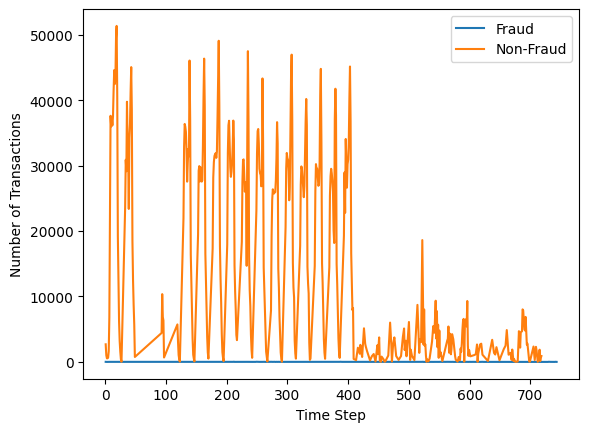

In [40]:
fraud_counts = df[df['isFraud'] == 1].groupby('step')['isFraud'].count()
non_fraud_counts = df[df['isFraud'] == 0].groupby('step')['isFraud'].count()

plt.plot(fraud_counts.index, fraud_counts.values, label='Fraud')
plt.plot(non_fraud_counts.index, non_fraud_counts.values, label='Non-Fraud')
plt.xlabel('Time Step')
plt.ylabel('Number of Transactions')
plt.legend()
plt.show()

Sự phân bố tần suất của các giao dịch gian lận đồng đều hơn trong các bước thời gian, trong khi các giao dịch không gian lận có nhiều khả năng xảy ra vào những thời điểm cụ thể.

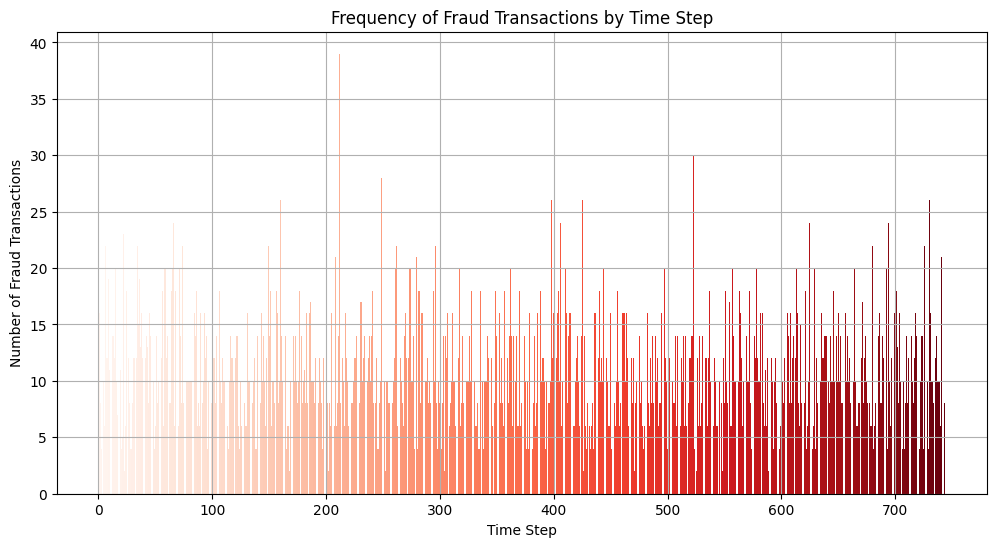

In [41]:
# Count the frequency of fraud transactions by time step
fraud_counts = new_df[new_df['isFraud'] == 1]['step'].value_counts().sort_index()

# Create a color palette
colors = sns.color_palette("Reds", len(fraud_counts))

# Plotting the frequency
plt.figure(figsize=(12, 6))
plt.bar(fraud_counts.index, fraud_counts.values, color=colors)
plt.xlabel('Time Step')
plt.ylabel('Number of Fraud Transactions')
plt.title('Frequency of Fraud Transactions by Time Step')
plt.grid(True)
plt.show()

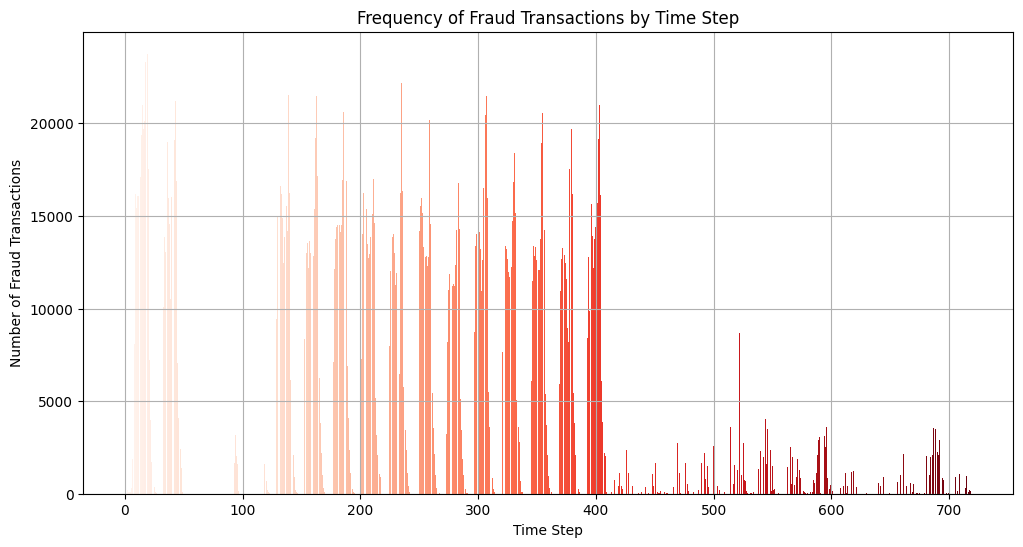

In [42]:
# Count the frequency of fraud transactions by time step
fraud_counts = new_df[new_df['isFraud'] == 0]['step'].value_counts().sort_index()

# Create a color palette
colors = sns.color_palette("Reds", len(fraud_counts))

# Plotting the frequency
plt.figure(figsize=(12, 6))
plt.bar(fraud_counts.index, fraud_counts.values, color=colors)
plt.xlabel('Time Step')
plt.ylabel('Number of Fraud Transactions')
plt.title('Frequency of Fraud Transactions by Time Step')
plt.grid(True)
plt.show()

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plotStrip(x, y, figsize=(14, 9)):
    fig = plt.figure(figsize=figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(x=x, y=y, jitter=0.4, marker='.', size=4, palette=colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['Fraud', 'Non-Fraud'], size=16)
        for axis in ['top', 'bottom', 'left', 'right']:
            ax.spines[axis].set_linewidth(2)

        # handles, labels = ax.get_legend_handles_labels()
        # plt.legend(handles, ['Fraud', 'Non-Fraud'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, fontsize=16)
    return ax



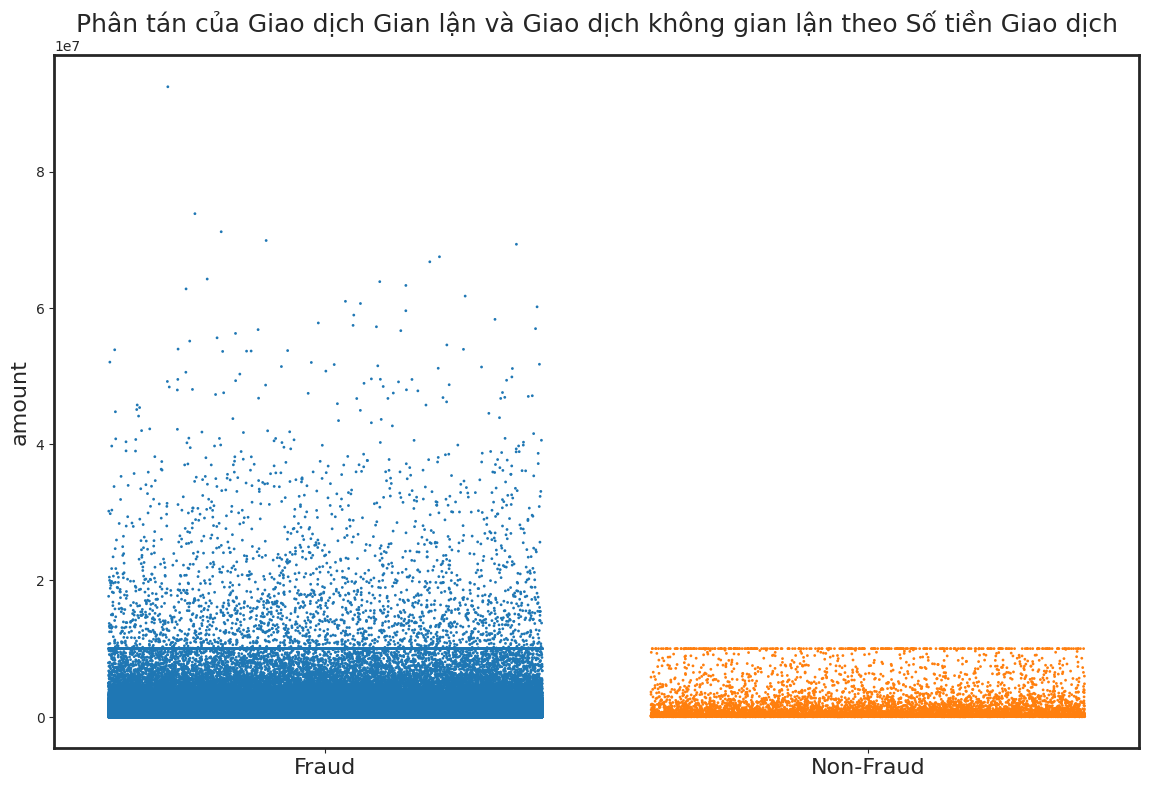

In [44]:
ax = plotStrip(x=new_df.isFraud, y=new_df.amount, figsize=(14, 9))
ax.set_ylabel('amount', size=16)
ax.set_title('Phân tán của Giao dịch Gian lận và Giao dịch không gian lận theo Số tiền Giao dịch', size=18)
plt.show()

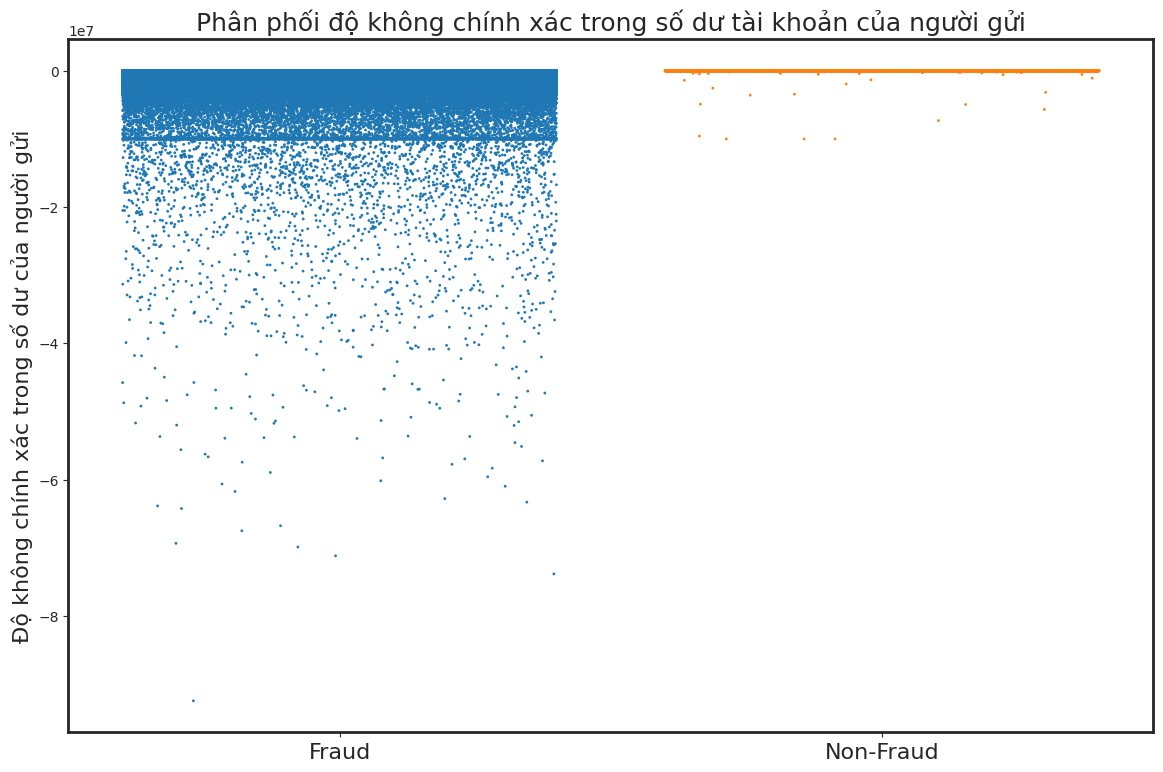

In [45]:
ax = plotStrip(x= new_df.isFraud, y = new_df.origBalance_inacc, figsize=(14, 9))
ax.set_ylabel('Độ không chính xác trong số dư của người gửi', size=16)
ax.set_title('Phân phối độ không chính xác trong số dư tài khoản của người gửi', size=18)
plt.show()

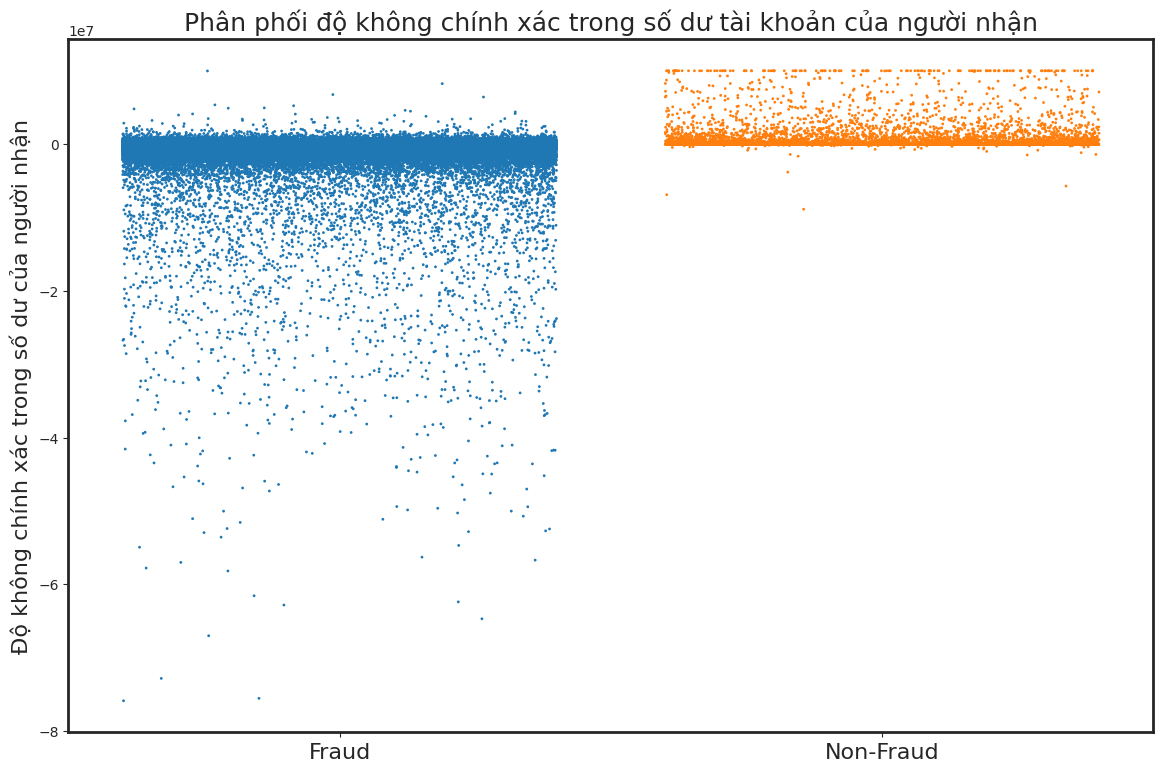

In [46]:
ax = plotStrip(x= new_df.isFraud, y = new_df.destBalance_inacc, figsize=(14, 9))
ax.set_ylabel('Độ không chính xác trong số dư của người nhận', size=16)
ax.set_title('Phân phối độ không chính xác trong số dư tài khoản của người nhận', size=18)
plt.show()

In [47]:
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,dest_final_balance,orig_final_balance,origBalance_inacc,destBalance_inacc
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,181.00,0.00,0.00,1.810000e+02
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0,21363.00,0.00,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,0,234216.94,-213808.94,-213808.94,1.827035e+05
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,237735.30,-214605.30,-214605.30,2.377353e+05
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,317952.89,-300850.89,-300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0,339682.13,0.00,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,6311409.28,0.00,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0,6379898.12,0.00,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,850002.52,0.00,0.00,8.500025e+05


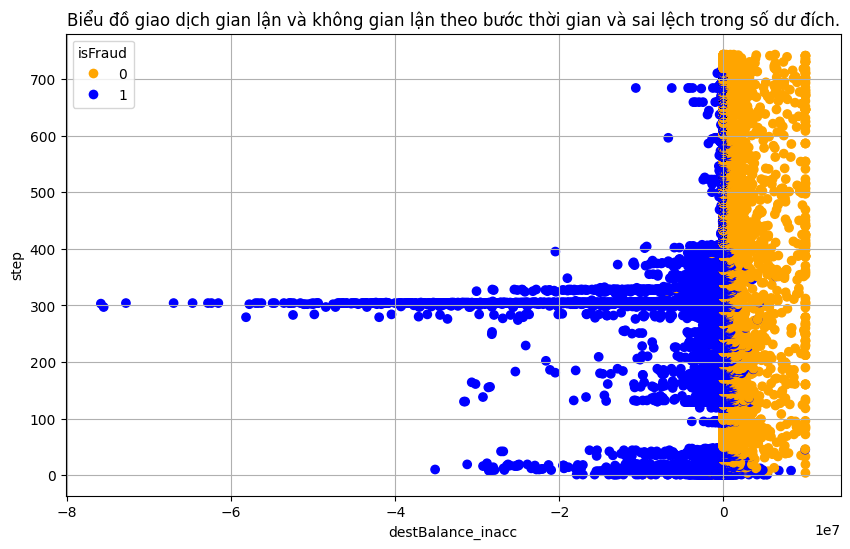

In [48]:
# Recreate the plot with the specified colors: orange for fraud and blue for non-fraud
plt.figure(figsize=(10, 6))

# Map fraud to orange and non-fraud to blue
colors = {0: 'blue', 1: 'orange'}

# Plot the data with customized colors
plt.scatter(new_df['destBalance_inacc'], new_df['step'], c=new_df['isFraud'].map(colors), label='isFraud')

# Adding labels and title
plt.title('Biểu đồ giao dịch gian lận và không gian lận theo bước thời gian và sai lệch trong số dư đích.')
plt.xlabel('destBalance_inacc')
plt.ylabel('step')

# Add legend manually
fraud_label = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=8, label='0')
nonfraud_label = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='1')
plt.legend(handles=[fraud_label, nonfraud_label], title="isFraud")

plt.grid(True)
plt.show()


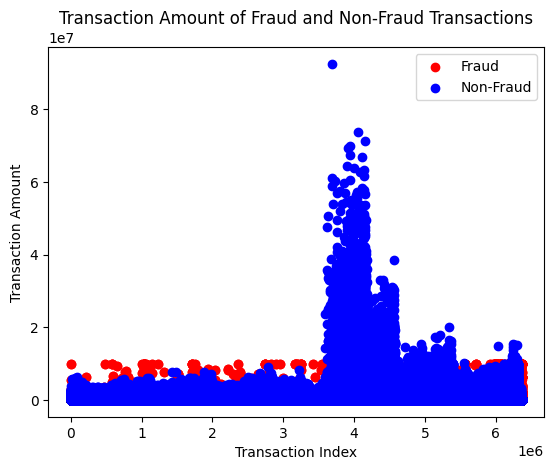

In [49]:
fraud_transactions = new_df.loc[new_df['isFraud'] == 1]
non_fraud_transactions = new_df.loc[new_df['isFraud'] == 0]

plt.scatter(fraud_transactions.index, fraud_transactions['amount'], color='red', label='Fraud')
plt.scatter(non_fraud_transactions.index, non_fraud_transactions['amount'], color='blue', label='Non-Fraud')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount of Fraud and Non-Fraud Transactions')
plt.legend()
plt.show()



In [50]:
new_df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'dest_final_balance', 'orig_final_balance',
       'origBalance_inacc', 'destBalance_inacc'],
      dtype='object')

In [51]:
new_df = new_df.drop(['nameOrig', 'nameDest','dest_final_balance', 'orig_final_balance', 
                    'origBalance_inacc', 'destBalance_inacc'], axis=1)


# Model 

### Tên (hoặc ID) của người khởi tạo và người đến không cần thiết để phân loại. 

### One Hot Encoding

In [52]:
# Tạo biến giả thông qua mã hóa one hot cho cột 'type'
new_df = pd.get_dummies(new_df, columns=['type'], prefix=['type'])

In [53]:
new_df.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud', 'type_CASH_OUT',
       'type_TRANSFER'],
      dtype='object')

### Chia dữ liệu

In [54]:
# Biến độc lập (ước lượng)
X = new_df.drop("isFraud", axis = 1)

# Biến phụ thuộc (nhãn)
y = new_df["isFraud"]
    

In [55]:
# Split your data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,shuffle=True, stratify=y, random_state = 42)

### Data Scaling

In [56]:
# Scaling data
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

X_train = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test = pd.DataFrame(X_test_scale, columns = X_test.columns)

Phương pháp được sử dụng để chia tỷ lệ dữ liệu là "Standard Scaling" và nó được sử dụng để chuẩn hóa dữ liệu bằng cách trừ đi giá trị trung bình và chia cho độ lệch chuẩn để dữ liệu được chuyển đổi có giá trị trung bình là 0 và độ lệch chuẩn là 1. Điều này rất quan trọng khi làm việc với các thuật toán giả định dữ liệu phân phối bình thường hoặc các thuật toán nhạy cảm với quy mô của các tính năng đầu vào. Mở rộng quy mô dữ liệu cũng có thể giúp ngăn chặn sự thống trị quá mức của bất kỳ tính năng đơn lẻ nào trong mô hình và có thể cải thiện hiệu suất tổng thể của nhiều thuật toán học máy.

# SMOTE

In [57]:
# khởi tạo kỹ thuật smote
smote = SMOTE()

y_train = y_train.astype(int)

# Chuyển đổi y_train thành một mảng NumPy
y_train_array = np.array(y_train)

# Khởi tạo thuật toán SMOTE
smote = SMOTE(random_state=42)

# Lấy mẫu lại dữ liệu đào tạo bằng SMOTE
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train_array)


In [59]:
# In các giá trị trước và sau SMOTE
print("Trưóc SMOTE:", Counter(y_train))
print("Sau SMOTE:", Counter(y_train_smote))

Trưóc SMOTE: Counter({0: 1933537, 1: 5738})
Sau SMOTE: Counter({0: 1933537, 1: 1933537})


In [60]:
# Kích thước của tập dữ liệu gốc và kích thước của tập dữ liệu đã lấy mẫu lại
print('Kích thước của tập dữ liệu gốc', len(new_df))
print('Kích thước của tập dữ liệu đã lấy mẫu lại', len(y_train_smote))

Kích thước của tập dữ liệu gốc 2770393
Kích thước của tập dữ liệu đã lấy mẫu lại 3867074


In [61]:
# Tạo biến cho mỗi cột trong tập dữ liệu
columns = list(new_df.columns)
columns

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud',
 'type_CASH_OUT',
 'type_TRANSFER']

In [62]:
# Loại bỏ các cột gốc
new_df.drop(['isFraud'],axis=1,inplace=True)

In [63]:
# Tạo một DataFrame mới với dữ liệu cân bằng
balanced_df = pd.DataFrame(X_train_smote, columns=columns)

# Lưu giá trị mặc định vào y_train_smote
balanced_df['isFraud'] = y_train_smote

In [64]:
# Kiểm tra kích thước của DataFrame mới
balanced_df.shape

(3867074, 10)

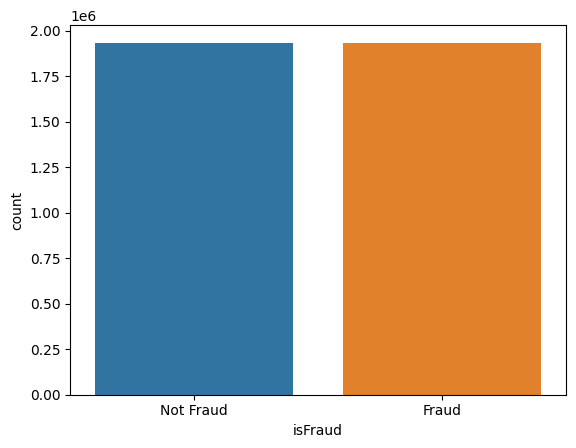

In [65]:
ax = sns.countplot(x='isFraud', data = balanced_df, palette=['#1f77b4', '#ff7f0e'])  
ax.set_xticklabels(('Not Fraud', 'Fraud'), rotation=0)
plt.show()

Kỹ thuật được sử dụng để xử lý tập dữ liệu mất cân bằng là "SMOTE" (Synthetic Minority Over-sampling Technique). Đó là một kỹ thuật lấy mẫu quá mức phổ biến để xử lý các bộ dữ liệu mất cân bằng bằng cách tạo ra các mẫu tổng hợp của tầng lớp thiểu số.

SMOTE hoạt động bằng cách chọn các mẫu tương tự trong không gian tính năng và tạo các mẫu mới bằng cách nội suy giữa chúng. Các mẫu mới được thêm vào tập dữ liệu gốc để cân bằng phân phối lớp.

# Logistic Regresion

In [69]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score

In [71]:
y_pred_lr = lr.predict(X_test) 

print("-------------- Logistic Regression Model --------------")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

print('\nAccuracy of logistic regression classifier on test set: {:.4f}'.format(accuracy_score(y_test, y_pred_lr)))

y_pred_lr_proba = lr.predict_proba(X_test)[:, 1] 
# Calculate and print AUC score
auc = roc_auc_score(y_test, y_pred_lr_proba)
print("AUC Score:", auc)

-------------- Logistic Regression Model --------------

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    580062
           1       0.94      0.95      0.95    580061

    accuracy                           0.95   1160123
   macro avg       0.95      0.95      0.95   1160123
weighted avg       0.95      0.95      0.95   1160123


Accuracy of logistic regression classifier on test set: 0.9486
AUC Score: 0.9891170430270803


In [72]:
from sklearn.metrics import confusion_matrix


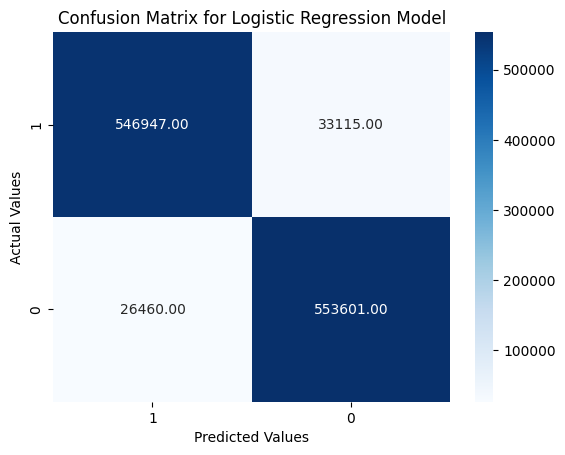

In [73]:
confusion_matrix = confusion_matrix(y_test, y_pred_lr)

ax = sns.heatmap(confusion_matrix,fmt=".2f", annot=True, cmap="Blues")

ax.set_title('Confusion Matrix for Logistic Regression Model')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])

plt.show()

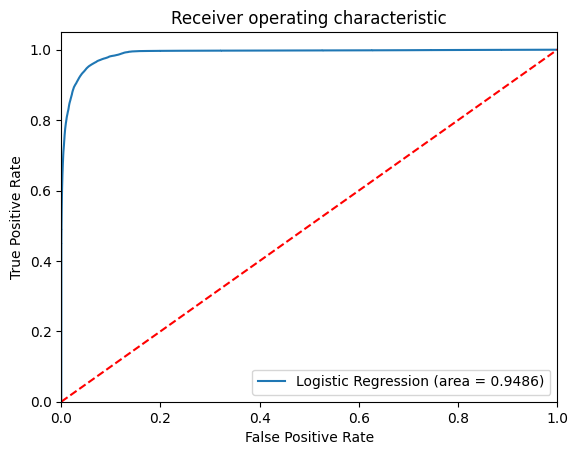

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve

logit_roc_auc = roc_auc_score(y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.4f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Random Forest

In [125]:
#creating Instance of Random Forest
rf_clf= RandomForestClassifier(n_estimators = 10)

rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [126]:
y_pred_rf = rf_clf.predict(X_test) 

print("-------------- Random Forest Model --------------")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print('\nAccuracy of Random Forest classifier on test set: {:.4f}'.format(accuracy_score(y_test, y_pred_rf)))

y_pred_rf_proba = rf_clf.predict_proba(X_test)[:, 1] 
# Calculate and print AUC score
auc = roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Score:", auc)

-------------- Random Forest Model --------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    580062
           1       1.00      1.00      1.00    580061

    accuracy                           1.00   1160123
   macro avg       1.00      1.00      1.00   1160123
weighted avg       1.00      1.00      1.00   1160123


Accuracy of Random Forest classifier on test set: 0.9990
AUC Score: 0.9998800241632877


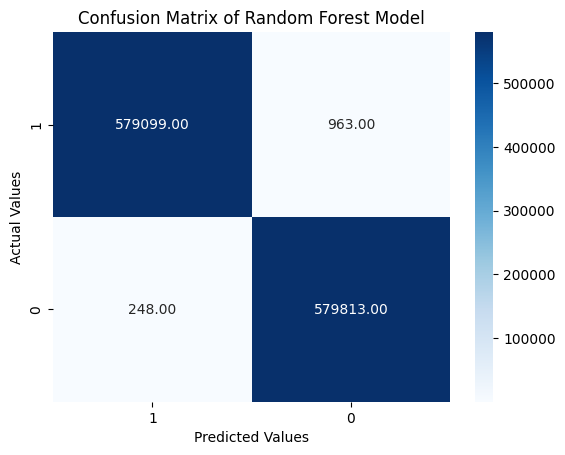

In [130]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_rf)

ax = sns.heatmap(confusion_matrix,fmt=".2f", annot=True, cmap="Blues")

ax.set_title('Confusion Matrix of Random Forest Model')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])

plt.show()


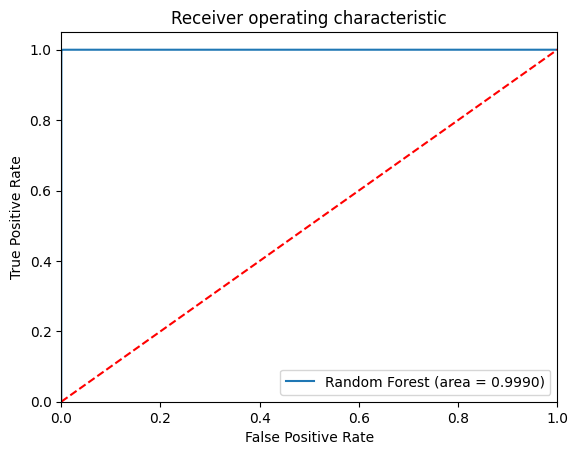

In [131]:
from sklearn.metrics import roc_auc_score, roc_curve

rf_roc_auc = roc_auc_score(y_test, rf_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.4f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [132]:
print("RandomForestClassifier Model")
rf_clf.get_params()

RandomForestClassifier Model


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [133]:
import graphviz
from sklearn.tree import export_graphviz


In [135]:
# Lấy tầm quan trọng của các đặc trưng
importances = rf_clf.feature_importances_

# Lấy tên của các đặc trưng từ DataFrame
feature_names = X_train.columns

# Sắp xếp tầm quan trọng và tên của các đặc trưng
indices = np.argsort(importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = importances[indices]

# In tầm quan trọng của các đặc trưng
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {sorted_feature_names[f]} ({sorted_importances[f]})")


Feature ranking:
1. feature oldbalanceOrg (0.4200012760365622)
2. feature amount (0.1375423534209876)
3. feature newbalanceDest (0.13142560166663572)
4. feature oldbalanceDest (0.1030216946616578)
5. feature step (0.08642142619490382)
6. feature newbalanceOrig (0.06478378332040031)
7. feature type_TRANSFER (0.03993216657671022)
8. feature type_CASH_OUT (0.01685612967736593)
9. feature isFlaggedFraud (1.5568444776606693e-05)


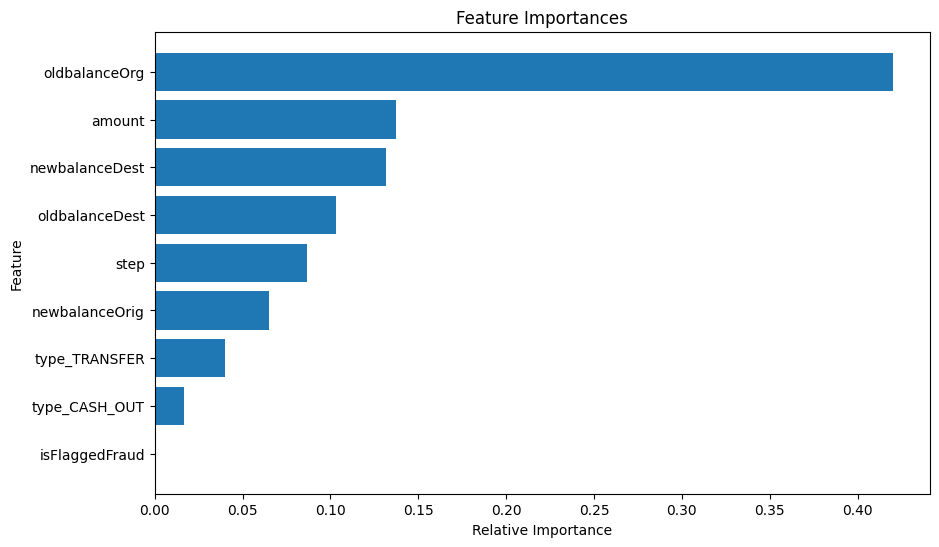

In [80]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X_train.shape[1]), sorted_importances, align="center")
plt.yticks(range(X_train.shape[1]), sorted_feature_names)
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.gca().invert_yaxis()  
plt.show()

### XG BOOST

In [81]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

In [106]:
weights = (y == 0).sum() / (1.0 * (y == 1).sum())
clf = XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=4,
              num_parallel_tree=None, random_state=None, ...)

In [128]:
y_pred_xg = clf.predict(X_test) 

print("-------------------- XGBoost Model --------------------")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xg))

print('\nAccuracy of XGBoost classifier on test set: {:.4f}'.format(accuracy_score(y_test, y_pred_xg)))

y_pred_xg_proba = clf.predict_proba(X_test)[:, 1] 
# Calculate and print AUC score
auc = roc_auc_score(y_test, y_pred_xg_proba)
print("AUC Score:", auc)

-------------------- XGBoost Model --------------------

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    580062
           1       0.99      1.00      0.99    580061

    accuracy                           0.99   1160123
   macro avg       0.99      0.99      0.99   1160123
weighted avg       0.99      0.99      0.99   1160123


Accuracy of XGBoost classifier on test set: 0.9926
AUC Score: 0.9995272119990608


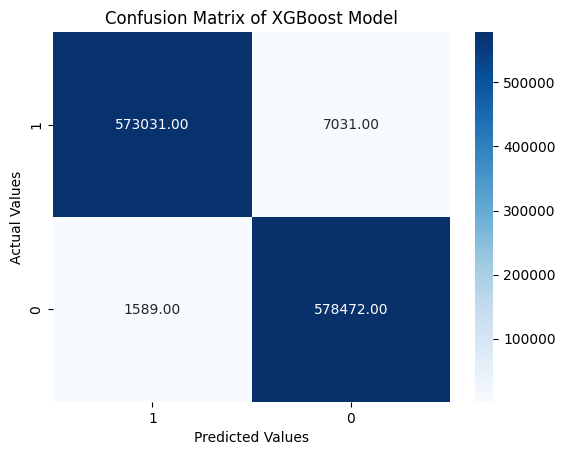

In [129]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred_xg)

ax = sns.heatmap(confusion_matrix,fmt=".2f", annot=True, cmap="Blues")

ax.set_title('Confusion Matrix of XGBoost Model')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')

ax.xaxis.set_ticklabels([1,0])
ax.yaxis.set_ticklabels([1,0])

plt.show()


In [84]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


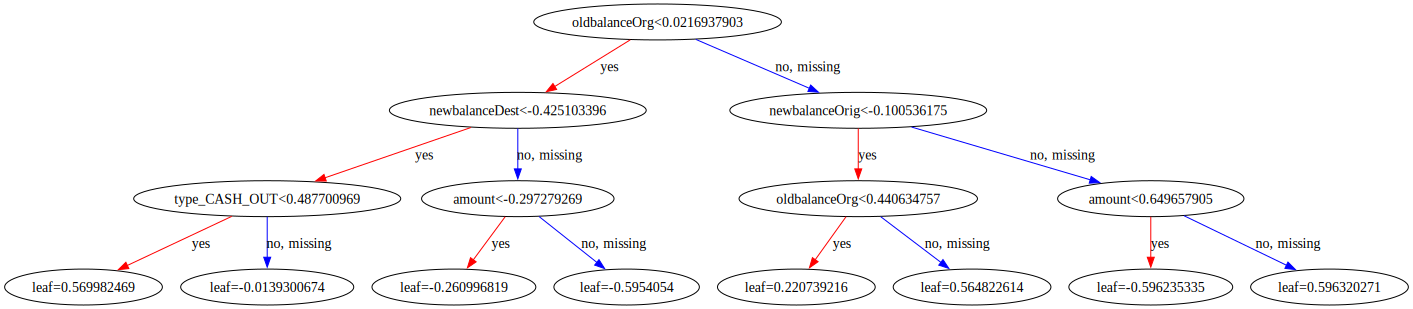

In [86]:
to_graphviz(clf)

In [87]:
trainSizes, trainScores, crossValScores = learning_curve(\
XGBClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4), X_train,\
                                         y_train, scoring = 'average_precision')

Text(0.5, 1.0, 'Learning curves indicate slightly underfit model')

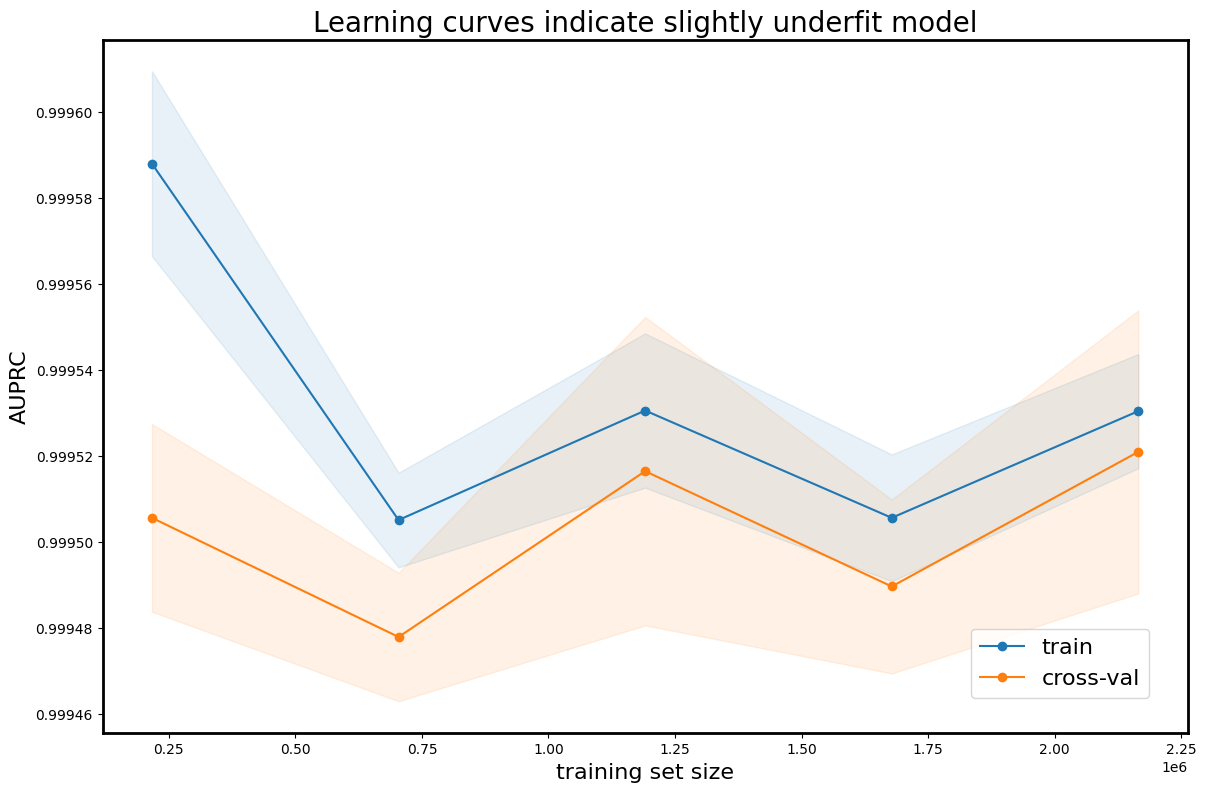

In [88]:
trainScoresMean = np.mean(trainScores, axis=1)
trainScoresStd = np.std(trainScores, axis=1)
crossValScoresMean = np.mean(crossValScores, axis=1)
crossValScoresStd = np.std(crossValScores, axis=1)

colours = plt.cm.tab10(np.linspace(0, 1, 9))

fig = plt.figure(figsize = (14, 9))
plt.fill_between(trainSizes, trainScoresMean - trainScoresStd,
    trainScoresMean + trainScoresStd, alpha=0.1, color=colours[0])
plt.fill_between(trainSizes, crossValScoresMean - crossValScoresStd,
    crossValScoresMean + crossValScoresStd, alpha=0.1, color=colours[1])
plt.plot(trainSizes, trainScores.mean(axis = 1), 'o-', label = 'train', \
         color = colours[0])
plt.plot(trainSizes, crossValScores.mean(axis = 1), 'o-', label = 'cross-val', \
         color = colours[1])

ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2)

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, ['train', 'cross-val'], bbox_to_anchor=(0.8, 0.15), \
               loc=2, borderaxespad=0, fontsize = 16);
plt.xlabel('training set size', size = 16); 
plt.ylabel('AUPRC', size = 16)
plt.title('Learning curves indicate slightly underfit model', size = 20)